<!--Información del curso-->
<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">

<center><h1 style="font-size:2em;color:#2467C0"> Caso de estudio: Juegos Olimpicos  </h1></center>

<center><h2 style="font-size:2em;color:#840700">  Pandas   </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/juegos_olimpicos.jpg" align="left" style="width:500px"/></td>
<td>

Los Juegos Olímpicos, también conocidos como Olimpiadas, son un importante evento deportivo internacional que se celebra cada cuatro años, reuniendo a atletas de todo el mundo para competir en diversas disciplinas deportivas.
   
    
<br>
</td>
</tr>
</table>

# Librerías

Cargando las bibliotecas que necesitamos 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Datos
* Revisar las primeras líneas de los archivos
* Utilizar las funciones de descripción e información para recopilar información estadística, tipos de datos, nombres de columnas y otra información. 



In [2]:
#Cargar el archivo datos/athlete_events.csv en un dataframe llamado df_atletas
df_atletas = pd.DataFrame(pd.read_csv('datos/athlete_events.csv'))

In [3]:
#Revisar las primeras líneas de los archivos
df_atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Encontrar los principales valores estadísticos 
df_atletas.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
#Cargar el archivo datos/datasets_31029_40943_noc_regions.csv en un dataframe llamado df_paises
df_paises = pd.DataFrame(pd.read_csv('datos/datasets_31029_40943_noc_regions.csv'))

In [6]:
#Mostrar las primeras líneas
df_paises.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### 1 . Combinando los dataframes
Combinar los dataframes **df_paises** y **df_atletas** en un dataframe llamado **df**. 

*Utilizar la columna 'NOC'*

In [7]:
#Utilizar pd.merge
df = pd.merge(df_atletas, df_paises, on='NOC')

In [8]:
#Mostrar las primeras líneas
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


### 2. Dataframe de medallas de oro 
Crear un dataframe solo de medallas de oro


In [9]:
#Mostrar los posibles valores  de la columna Medal
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [10]:
#Crear el dataframe df_MedallasOro solo con ganadores de medallas de oro.
df_MedallasOro = df[df['Medal'] == 'Gold']
df_MedallasOro

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270632,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
270660,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
270667,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
270700,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


#####  Distribución de edades de medallas de oro 


In [11]:
# Revisar si la columna Age tiene elementos nulos 
df_MedallasOro['Age'].isnull().sum()

np.int64(148)

In [12]:
#Revisar los diferentes valores de Age
df_MedallasOro['Age'].unique()

array([34., 28., 20., 30., 27., 31., 25., 21., 23., 22., 38., 29., 26.,
       35., 15., 19., 24., 33., 45., 16., 18., nan, 49., 40., 39., 32.,
       41., 17., 44., 54., 46., 56., 36., 37., 42., 47., 43., 52., 14.,
       48., 50., 13., 57., 53., 59., 63., 64., 51., 60., 55., 58.])

In [13]:
# Eliminar las filas con 'nan' 
df_MedallasOro = df_MedallasOro.dropna(subset=['Age'])

In [14]:
#Mostrar nuevamente los posibles valores de la columna 'Age'
df_MedallasOro['Age'].unique()

array([34., 28., 20., 30., 27., 31., 25., 21., 23., 22., 38., 29., 26.,
       35., 15., 19., 24., 33., 45., 16., 18., 49., 40., 39., 32., 41.,
       17., 44., 54., 46., 56., 36., 37., 42., 47., 43., 52., 14., 48.,
       50., 13., 57., 53., 59., 63., 64., 51., 60., 55., 58.])

<Axes: >

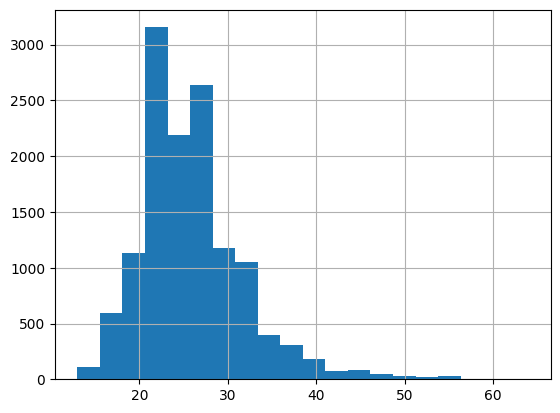

In [15]:
#Mostrar un histograma de la columna 'Age' con 20 bins
df_MedallasOro['Age'].hist(bins=20)

In [16]:
# ¿Cuantas personas mayores a 50 han ganado una medalla de oro?
(df_MedallasOro['Age'] > 50).sum()

np.int64(65)

##### ¿Qué disciplinas te permiten conseguir una medalla de oro después de los cincuenta? 

In [17]:
#Mostrar las diferentes disciplinas (mayores a 50)
df_MedallasOro[df_MedallasOro['Age']>50]['Sport'].unique()

array(['Equestrianism', 'Sailing', 'Alpinism', 'Art Competitions',
       'Curling', 'Roque', 'Shooting', 'Archery', 'Croquet'], dtype=object)

In [18]:
#Mostrar el número de ganadores por disciplina (mayores a 50)
df_MedallasOro[df_MedallasOro['Age'] > 50]['Sport'].value_counts()

Sport
Equestrianism       18
Sailing             12
Shooting            11
Archery             11
Art Competitions     8
Curling              2
Alpinism             1
Roque                1
Croquet              1
Name: count, dtype: int64

### 3. Mujeres en atletismo 


In [19]:
# Crear un dataframe para mujeres llamado df_women 
# Considerar solamente los juegos de verano

df_women = df[(df['Sex'] == 'F') & (df['Season'] == 'Summer')]
df_women

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270731,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN
270750,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN,Greece,NaN
270753,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN
270754,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,Russia,NaN


In [20]:
#Crear un gráfico en el que colocamos el año (en el eje x) 
# y contamos el número de participantes por edición de los juegos 

In [21]:
#Revisar el numero de participantes mujeres en 2016


In [22]:
#Revisar el numero de participantes mujeres en 2016 con medalla de oro


### 4. Medallas de oro por país 


In [23]:
# Encontrar los cinco países con mayor número de medallas de oro 


# Ejercicio

**Parte 1**

Crear un dataframe para México llamado df_Mexico (solo datos de México)

<div class="alert alert-success">
   
1. Mostrar la distribución de edades (frecuencias). 
</div>

In [24]:
df_mexico = df[df['region'] == 'Mexico']
df_mexico

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
184,82,Enrique Abaroa Martnez,M,26.0,183.0,75.0,Mexico,MEX,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Men's Doubles,NaN,Mexico,NaN
205,98,Hctor Abaunza,M,30.0,169.0,75.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Fencing,"Fencing Men's Foil, Individual",NaN,Mexico,NaN
206,98,Hctor Abaunza,M,30.0,169.0,75.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Fencing,"Fencing Men's Foil, Team",NaN,Mexico,NaN
207,98,Hctor Abaunza,M,30.0,169.0,75.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Fencing,"Fencing Men's Sabre, Team",NaN,Mexico,NaN
710,405,Jos Javier Abella Fanjul,M,22.0,176.0,66.0,Mexico,MEX,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,NaN,Mexico,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268222,134358,Omar Zepeda de Lon,M,39.0,175.0,70.0,Mexico,MEX,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,NaN,Mexico,NaN
268262,134383,Jos Luis Zertuche Chvez,M,27.0,172.0,71.0,Mexico,MEX,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Light-Middleweight,NaN,Mexico,NaN
269378,134967,Pablo Zierold Reyes,M,NaN,173.0,NaN,Mexico,MEX,1932 Summer,1932,Summer,Los Angeles,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Mexico,NaN
269613,135062,"Antonio Lus ""Zinha"" Naelson Matas",M,28.0,163.0,66.0,Mexico,MEX,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,NaN,Mexico,NaN


<div class="alert alert-success">
   
2. Mostrar la participación de desportistas mexicanos en las competencias de Verano (frecuencias por año). 
</div>

<Axes: xlabel='Año', ylabel='Participantes Mexicanos'>

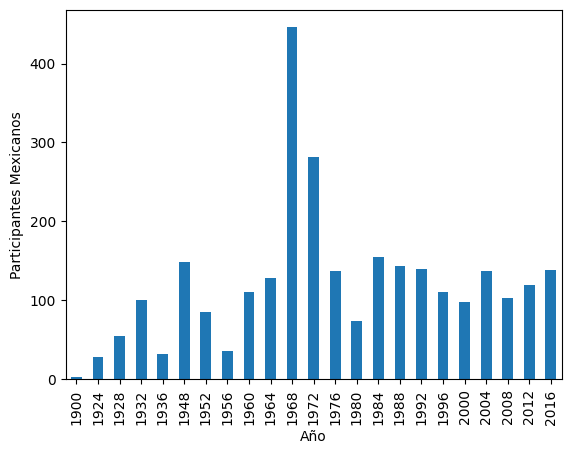

In [25]:
df_mexico[df_mexico['Season'] == 'Summer']['Year'].value_counts().sort_index().plot(kind='bar', xlabel='Año', ylabel='Participantes Mexicanos')

<div class="alert alert-success">
   
3. Encontrar el numero total de medallas de oro, plata y bronce. 
</div>

In [26]:
df_mexico['Medal'].value_counts()

Medal
Bronze    54
Gold      30
Silver    26
Name: count, dtype: int64

<div class="alert alert-success">

4. Encontrar a los deportistas mexicanos con 2 o más medallas. 
</div>


In [30]:
((df_mexico.groupby('Name')['Medal'].count().sort_values(ascending=False)) >= 2)

Name
Joaqun Capilla Prez                    True
Humberto Mariles Corts                 True
Mara del Rosario Espinoza Espinoza     True
Germn Sal Snchez Snchez                True
Joaqun Prez de las Heras               True
                                      ...  
Yvonne Trevino Hayek                  False
Zeno Fernndez d'Acosta                False
Ziranda Madrigal lvarez-Ugena         False
Zudikey Rodrguez Nez                  False
Adolfo Augusto Heriberto Clouthier    False
Name: Medal, Length: 1544, dtype: bool

In [27]:
medals_mexicans = df_mexico.groupby('Name')['Medal'].count().sort_values(ascending=False)
medals_mexicans[medals_mexicans >= 2]

Name
Joaqun Capilla Prez                   4
Humberto Mariles Corts                3
Mara del Rosario Espinoza Espinoza    3
Germn Sal Snchez Snchez               2
Joaqun Prez de las Heras              2
Paola Milagros Espinosa Snchez        2
Ral Gonzlez Rodrguez                  2
Rubn Uriza Castro                     2
Name: Medal, dtype: int64

# Ejercicio

**Parte 2**

*Utilizar todos los datos* 

<div class="alert alert-success">

5. Encontrar a los 5 deportistas con más medallas de oro en los juegos de Verano. 
</div>

In [28]:
df[df['Medal'] == 'Gold'].groupby('Name')['Medal'].count().sort_values(ascending=False).head()

Name
Michael Fred Phelps, II           23
Raymond Clarence "Ray" Ewry       10
Mark Andrew Spitz                  9
Frederick Carlton "Carl" Lewis     9
Paavo Johannes Nurmi               9
Name: Medal, dtype: int64

<div class="alert alert-success">
6. Encontrar el deportista (o deportistas) más joven en ganar un medalla de oro, también mencionar: la edad, año de obtención, disciplina y juegos (verano o invierno,). 
</div>

In [75]:
df[df['Medal'] == 'Gold']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270632,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
270660,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
270667,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
270700,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


<div class="alert alert-success">

7. ¿Qué deporte (sport) ha tenido el mayor número de participantes  en toda su historia (contando solo lo reportado en el archivo)? 

</div>